# Sustainable Energy: Ambitious Goals vs Economic Feasibility

**Team 40**  
Hanna Daorah (15565823)  
Leonardo Sabatini (15781542)  
Jordan Cheuk-Alam (15086796)  
Santino Petrovic (15675602)

---

# Table of Contents
1. [Introduction](#introduction)
2. [Dataset and Preprocessing](#dataset-and-preprocessing)
3. [Perspective 1: Ambitious Transition](#perspective-1-ambitious-transition)
4. [Perspective 2: Gradual Transition](#perspective-2-gradual-transition)
5. [Visualizations Overview](#visualizations-overview)
6. [Reflection](#reflection)
7. [Work Distribution](#work-distribution)

---

# Introduction (has to be improved upon with sources etc.)

The global shift towards sustainable energy has ignited divergent views on how quickly and extensively this transition should occur. While one side argues for rapid decarbonization supported by the exponential growth of renewable technologies, the other side warns of practical constraints and calls for a more measured transition to preserve energy security and economic stability.

This data story juxtaposes these two perspectives. By analyzing monthly energy production data alongside macro-level indicators of renewable energy adoption and socio-economic context, we aim to surface the key tensions and trade-offs in the current energy debate.

**Perspective 1: Ambitious Transition**  
- Renewable energy is scaling rapidly and displacing fossil fuels.
- This trend justifies aggressive investment in solar, wind, and hydropower.
- Argument visualized through multi-line plots and area charts showing rapid growth in renewable sources.

**Perspective 2: Gradual Transition**  
- Despite growth, renewables remain a minority in many countries.
- Infrastructure and economic dependencies necessitate fossil fuels during the transition.
- Argument supported by choropleth maps and scatterplots revealing cross-country disparities and constraints.

---

# Dataset and Preprocessing

This section outlines the datasets used in our analysis, their origin, structure, and the preprocessing steps necessary to ensure consistency, relevance, and analytical clarity. By combining high-frequency electricity production data with annual sustainability indicators, we enable both temporal and cross-sectional analyses of the global energy transition.


## Datasets

### Dataset 1: Monthly Electricity Production per Source

- **Source:** [Kaggle – IEA Monthly Electricity Statistics](https://www.kaggle.com/datasets/ccanb23/iea-monthly-electricity-statistics)  
- **Original File:** `data.csv`  
- **Period Covered:** 2010–2022  
- **Size:** 181,915 rows, 12 columns  
- **Key Fields:**
  - `COUNTRY`: Name of the reporting country  
  - `PRODUCT`: Type of energy source (e.g., Solar, Wind, Hydro, Fossil fuels)  
  - `VALUE`: Monthly electricity production in GWh  
  - `YEAR`, `MONTH`: Timestamp fields  
  - `share`: Monthly fraction of each source in total production  

This dataset enables granular, source-specific monthly energy trend analysis by country.

---

### Dataset 2: Global Sustainable Energy Indicators

- **Source:** [Kaggle – Global Data on Sustainable Energy](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy)  
- **Original File:** `global-data-on-sustainable-energy.csv`  
- **Period Covered:** 2000–2020  
- **Size:** 3,649 rows, 21 columns  
- **Key Variables:**
  - `Renewable energy share in total final energy consumption (%)`  
  - `Access to electricity (% of population)`  
  - `Access to clean fuels for cooking (%)`  
  - `gdp_per_capita`  
  - `gdp_total`

This dataset supports macro-level evaluation of energy access, economic capacity, and renewable adoption across countries.

---

## Preprocessing

### Phase 1: Structural Harmonization
- Renamed inconsistent columns (e.g., `Entity` → `COUNTRY`, `Value` → `VALUE`).
- Created a unified datetime column (`DATE`) by merging `YEAR` and `MONTH`.
- Filtered out aggregate entries (e.g., “World”, “OECD”) and irrelevant metadata fields.
- Selected a consistent subset of `PRODUCT` categories relevant to the energy transition (e.g., Solar, Wind, Hydro, Fossil fuels).

### Phase 2: Standardization and Feature Engineering
- Normalized country and category naming conventions across datasets.
- Retained the `share` field from the production dataset for proportional analysis.
- Engineered new variable `YoY_Growth_Renewable`: year-over-year percentage point change in renewable energy share.
- Trimmed both datasets to remove unused columns and reduce dimensionality.

**Note:** Cleaned versions were kept in memory. For larger pipelines, exporting to compressed `.parquet` format with gzip is recommended to preserve structure and minimize I/O load.

---

## Core Variables

### Continuous Variables
- `VALUE` (GWh): Monthly electricity production  
- `share` (0–1): Source’s share of total monthly production  
- `Renewable energy share in total final energy consumption (%)`  
- `Access to electricity (% of population)`  
- `Access to clean fuels for cooking (%)`  
- `gdp_per_capita` (USD)  
- `YoY_Growth_Renewable`: Annual change in renewable share

### Categorical Variables
- `COUNTRY`: Reporting country  
- `PRODUCT`: Energy source category

### Temporal Variables
- `DATE`: Monthly (production data) or annual (indicator data) timestamp

---

## Aggregations for Visualization

1. **Monthly Energy Production Trends**  
   - Aggregated `VALUE` by `PRODUCT` and `DATE` to compare time-series trends of different sources.

2. **Country-Level Fossil vs Renewable Comparison**  
   - Summed annual production per country by source type; ranked top 10 countries.

3. **Renewable Share and Access to Electricity Over Time**  
   - Computed annual averages across selected countries (e.g., G20).

4. **Renewable Share vs GDP per Capita**  
   - Merged economic and energy indicators for scatterplots and animated bubble charts.

5. **Annual Renewable Growth (YoY)**  
   - Calculated and mapped year-over-year changes in renewable share via choropleth.

6. **Country-Focused Renewable Trends**  
   - Displayed annual renewable share for selected countries using small multiples.

These steps enable high-resolution tracking of production growth, comparative socio-economic context, and progress disparities across countries and energy sources.


---

# Perspective 1: Ambitious Transition

**Argument 1.1: Renewables are rapidly scaling and replacing fossil fuels**  
- Multi-line chart of monthly production from 2010–2022 shows increasing renewable output.
- Stacked area chart illustrates renewable share expansion over time.

**Argument 1.2: Certain countries are nearing or exceeding targets**  
- Choropleth map for latest year highlights countries with high renewable shares.
- Faceted line charts show renewable share trends over time for selected high-performing countries.

---


# Perspective 2: Gradual Transition

**Argument 2.1: Most countries remain far below renewable targets**  
- Choropleth map with red-green scale shows uneven global uptake.
- Bar chart comparison between fossil and renewable sources for top producing countries.

**Argument 2.2: Economic and access constraints limit renewable adoption**  
- Scatter plot: GDP per capita vs Renewable Share, with access to electricity as bubble size.
- Pair plot matrix reveals correlations between economic indicators and renewable uptake.

**Argument 2.3: Year-on-year change is minimal or regressive in many cases**  
- Choropleth animation: annual change in renewable share classified as increase/decline.
- Annotations show stagnation in key developing nations.

---

# Visualizations Overview (not done, just an example)

| Visualization Type            | Variable(s) Used                                                  | Argument Link                        | Status            |
|------------------------------|-------------------------------------------------------------------|--------------------------------------|-------------------|
| Multi-line Time Series       | `VALUE`, `PRODUCT`, `YEAR`, `MONTH`                              | Arg. 1.1                              | Nearly finished   |
| Stacked Area Chart           | `VALUE`, `PRODUCT`, `MONTHLY SHARE`                              | Arg. 1.1                              | Nearly finished   |
| Choropleth (latest share)    | `Renewable Share (%)`, `Entity`, `Year`                          | Arg. 1.2, 2.1                         | Nearly finished   |
| Faceted Line Charts          | `Renewable Share (%)`, `Entity`, `Year`                          | Arg. 1.2                              | Nearly finished   |
| Bubble Chart                 | `gdp_per_capita`, `Renewable Share`, `Access to Electricity`     | Arg. 2.2                              | Draft version     |
| Pair Plot Matrix             | Multiple socio-economic and energy indicators                    | Arg. 2.2                              | Draft version     |
| Animated Choropleth (Growth)| `Growth_Cat`, `Year`, `Entity`                                   | Arg. 2.3                              | Nearly finished   |
| Bar Chart (Top Countries)    | `VALUE`, `PRODUCT`, `COUNTRY`                                    | Arg. 2.1                              | Draft version     |





### Dataset Loading

This cell loads the two primary datasets used throughout the analysis:

- `data.csv`: Monthly electricity production by energy source and country (2010–2022)
- `global-data-on-sustainable-energy.csv`: Annual sustainability indicators per country (2000–2020)

These datasets form the foundation for all subsequent preprocessing, visualizations, and argumentation.


In [1]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"


import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Laad de originele datasets
monthly_df = pd.read_csv("data.csv")
global_df = pd.read_csv("global-data-on-sustainable-energy.csv")


### Monthly Energy Production by Source (GWh)

This line chart displays the monthly electricity production of three major energy sources: **Solar**, **Wind**, and **Total Combustible Fuels** from 2010 to 2022. The graph highlights the dynamic interplay between renewable and fossil-based generation, showing a clear upward trend for wind and solar, while fossil fuels exhibit more fluctuation.

- **X-axis:** Time (monthly, 2010–2022)  
- **Y-axis:** Electricity production in gigawatt-hours (GWh)  
- **Lines:** Energy sources  
- **Purpose:** Supports Argument 1.1 by visualizing the growth of renewables over time


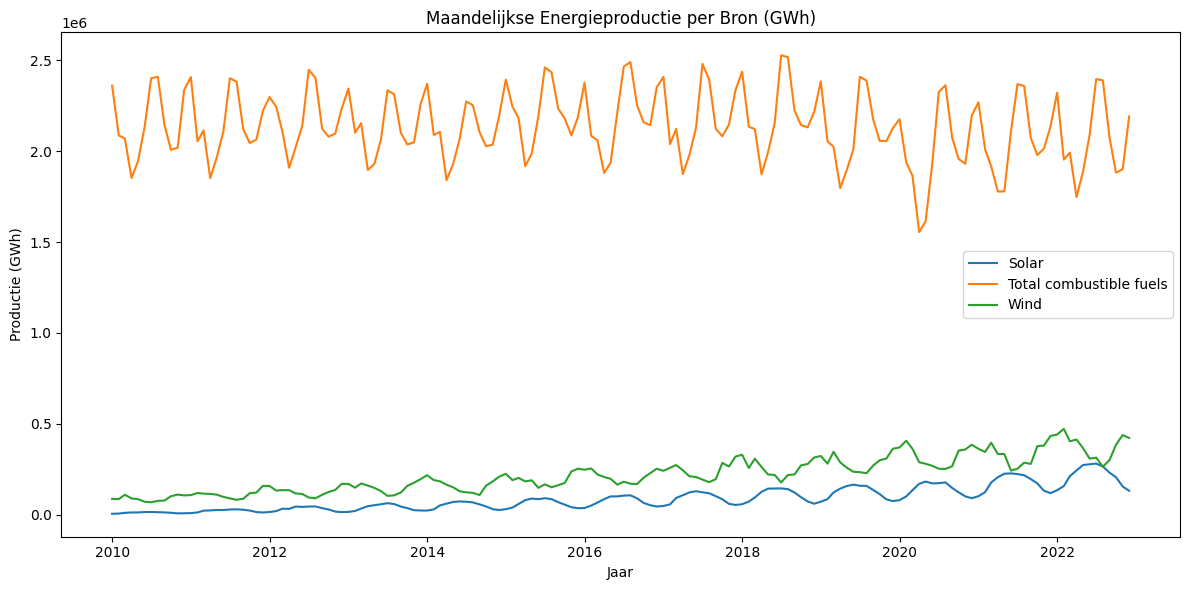

In [2]:
import matplotlib.pyplot as plt

main_sources = ['Solar', 'Wind', 'Total combustible fuels']
df = monthly_df[monthly_df['PRODUCT'].isin(main_sources)].copy()
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str))
pivot = df.pivot_table(index='DATE', columns='PRODUCT', values='VALUE', aggfunc='sum').dropna()

plt.figure(figsize=(12, 6))
for col in pivot.columns:
    plt.plot(pivot.index, pivot[col], label=col)
plt.title("Maandelijkse Energieproductie per Bron (GWh)")
plt.xlabel("Jaar")
plt.ylabel("Productie (GWh)")
plt.legend()
plt.tight_layout()
plt.show()


### Energy Source Share Over Time (Stacked Area Chart)

This stacked area chart visualizes the proportional share of four key energy sources—**Solar**, **Wind**, **Hydro**, and **Total Combustible Fuels**—within the total monthly electricity production from 2010 to 2022. The graph emphasizes the evolving composition of the energy mix, highlighting the gradual increase of renewables relative to fossil fuels.

- **X-axis:** Time (monthly, 2010–2022)  
- **Y-axis:** Share of total electricity production (0–1 scale)  
- **Areas:** Energy sources stacked to reflect cumulative share proportions  
- **Transparency:** Set to 0.8 for visibility of overlapping areas  
- **Purpose:** Supports Argument 1.1 by illustrating the growth in renewable energy’s share and the declining relative contribution of fossil fuels over time


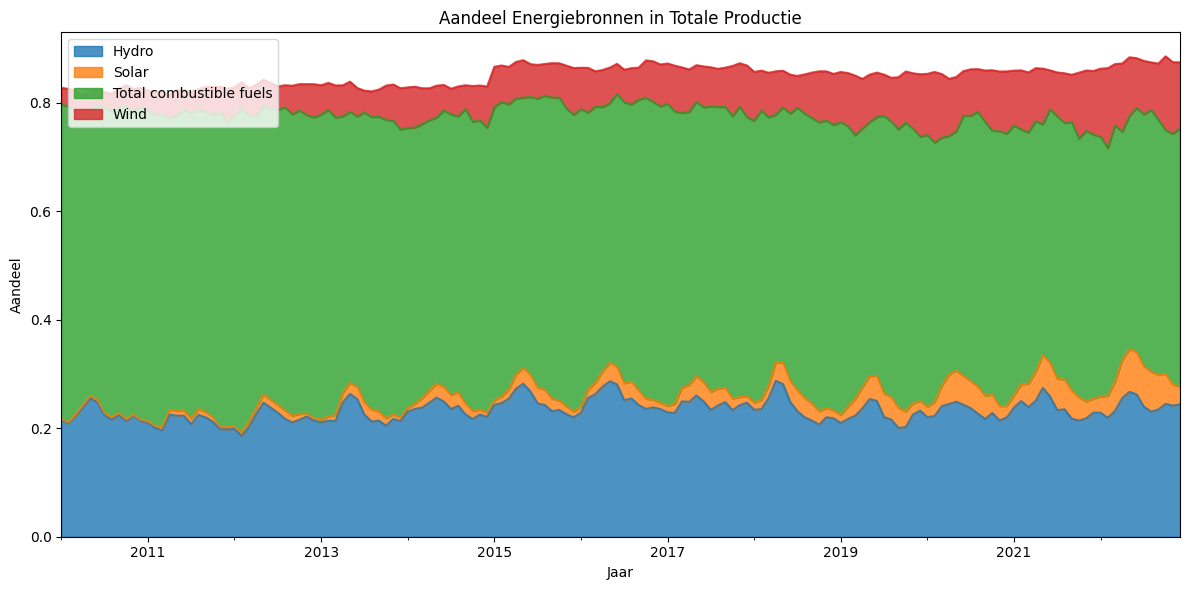

In [3]:
stack_sources = ['Solar', 'Wind', 'Hydro', 'Total combustible fuels']
df = monthly_df[monthly_df['PRODUCT'].isin(stack_sources)].copy()
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str))
pivot_share = df.pivot_table(index='DATE', columns='PRODUCT', values='share', aggfunc='mean').fillna(0)

pivot_share.plot.area(figsize=(12, 6), alpha=0.8)
plt.title("Aandeel Energiebronnen in Totale Productie")
plt.xlabel("Jaar")
plt.ylabel("Aandeel")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### Latest Renewable Energy Share by Country (Choropleth Map)

This choropleth map displays the most recent available data for the share of renewable energy in total final energy consumption across countries. It uses a green-yellow gradient to represent the percentage share, visually distinguishing countries with higher versus lower renewable energy adoption.

- **Geography:** Countries worldwide, identified by name  
- **Color scale:** Continuous, from low (yellow) to high (green) renewable share  
- **Data points:** Latest year with valid data per country  
- **Interactivity:** Hover reveals country name and year of data  
- **Projection:** Natural Earth for accurate global representation  
- **Purpose:** Supports Arguments 1.2 and 2.1 by highlighting geographic disparities in renewable energy adoption at the most current time point


In [4]:
import pandas as pd
import plotly.express as px

# Kolomnaam instellen
col = 'Renewable energy share in the total final energy consumption (%)'

# Filter op rijen met geldige waarden
filtered = global_df[['Entity', 'Year', col]].dropna()

# Kies per land het laatste jaar met data
latest = filtered.loc[filtered.groupby('Entity')['Year'].idxmax()].copy()
latest.rename(columns={col: 'Renewable Share (%)'}, inplace=True)

# Plot met Plotly
fig = px.choropleth(
    latest,
    locations="Entity",
    locationmode="country names",
    color="Renewable Share (%)",
    color_continuous_scale="YlGn",
    title="Laatste Beschikbare Renewable Energy Share per Land",
    hover_name="Entity",
    hover_data={"Year": True}
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="natural earth"
    ),
    coloraxis_colorbar=dict(
        title="% Renewable",
        ticks="outside"
    )
)

fig.show()




# Reflection

We integrated peer and TA feedback to:
- Increase the clarity of our arguments in the visualizations’ captions
- Ensure balance between interactivity and interpretability
- Reduce overcrowded visuals by filtering key categories and countries
- Restructure the story to align more closely with reader logic

We also used design heuristics to evaluate our visual encoding choices, ensuring effective axis scaling, color-blind safe palettes, and proper chart types for each relationship.

---

# Work Distribution

- **Leonardo Sabatini:** Dataset 2 preprocessing, GDP-related visualizations, GitHub Pages + Jupyter Book setup  
- **Hanna Daorah:** Dataset 1 preprocessing, multi-line + area plots, data wrangling scripts  
- **Jordan Cheuk-Alam:** Choropleth design, faceted line charts, animated plots  
- **Santino Petrovic:** Argument structure, markdown writing, visual layout consistency  

All team members participated in regular coordination and revision sessions. Visual decisions and interpretations were reviewed jointly.

---
